# 线性插值

## 以文件1为例

In [1]:
import pandas as pd
import datetime
import numpy as np

# 读取文件1
data = pd.read_excel('file1.xlsx')
X = data['时间']
# 将时间列由str转换成datetime类型
time_list = [datetime.datetime.strptime(str(i), '%Y/%m/%d %H:%M:%S.%f.') for i in X]
data['时间'] = time_list
n = len(X)

In [46]:
# 时间间隔下标
interval = []
# 时间间隔
delt_times = []
for i in range(len(time_list)-1):
    delt_time = time_list[i+1] - time_list[i]
    if delt_time.total_seconds() > 1.0:
        delt_times.append(delt_time.total_seconds())
        interval.append(i)

In [98]:
# List转成numpy的array类型,方便使用Fancy Indexing
interval_np = np.array(interval)
delt_times_np = np.array(delt_times)

# 所有时间间隔大于120s的下标
interval_np = interval_np[delt_times_np>120.0]
interval_np

array([  4217,   5031,   5419,   5858,   6778,   6864,   7425,   9403,
         9530,  10904,  10991,  13513,  14997,  16800,  18932,  19431,
        21237,  22324,  22885,  23838,  25026,  26156,  26383,  26918,
        27113,  27239,  28218,  32641,  32679,  32724,  32801,  32963,
        33200,  34744,  37024,  38002,  38185,  38323,  38697,  38909,
        39253,  40053,  40906,  41295,  41353,  41459,  41619,  41810,
        41987,  42026,  42140,  42534,  42874,  42941,  43621,  43753,
        43886,  43955,  44320,  45303,  45717,  47391,  49661,  49932,
        49934,  50487,  52822,  52866,  54640,  55026,  55862,  56718,
        56885,  57120,  57679,  57801,  58508,  59958,  61832,  62146,
        62641,  63298,  63590,  64026,  64515,  64591,  64633,  65610,
        66460,  66847,  68804,  70127,  70152,  71255,  71507,  72544,
        73123,  73371,  79761,  80232,  84056,  84603,  85740,  87123,
        87930,  88412,  90802,  92115,  92945,  93616,  93716,  97225,
      

In [2]:
# 生成全序列时间样本，无间隔
helper = pd.DataFrame({'时间':pd.date_range(start=data['时间'][0], end=data['时间'][n-1], freq='S')})
# 与文件1合并,间隔内的其他列全为Nan值
data = pd.merge(data, helper, on='时间', how='outer').sort_values('时间')

In [44]:
# 对GPS车速列进行线性插值
data['GPS车速'] = data['GPS车速'].interpolate(method='time')
# 带着插入后的index 写入文件
data.to_csv('gole.csv',encoding='utf-8', index_label='index')

In [26]:
# 插值后数据条目
print(len(data))

518137


In [92]:
# 读取文件,第一列是index
gole = pd.read_csv('gole.csv')

## 实验效果

删除原id=1314~1315之间插入的数据

这是我做实验用的,运行过这部分代码后,在对整个文件进行数据删除就会报错

因为其中的1314~1315已经被删除了,不能重复删除

In [93]:
gole.loc[gole['index']==1314]

,index,时间,GPS车速,X轴加速度,Y轴加速度,Z轴加速度,经度,纬度,发动机转速,扭矩百分比,瞬时油耗,油门踏板开度,空燃比,发动机负荷百分比,进气流量
1314,1314,2017-12-18 14:04:07,60.9,0.0,-0.486,-0.918,119.40564,25.954413,1537.0,13.0,0.29,0.075,0.1463,17.0,3.07


In [94]:
gole.loc[gole['index']==1315]

,index,时间,GPS车速,X轴加速度,Y轴加速度,Z轴加速度,经度,纬度,发动机转速,扭矩百分比,瞬时油耗,油门踏板开度,空燃比,发动机负荷百分比,进气流量
1383,1315,2017-12-18 14:05:16,14.6,0.0,-0.36,-0.954,119.410956,25.952053,1487.0,34.0,0.88,0.11,0.1465,38.0,9.01


In [95]:
start = gole[gole['index']==1314].index[0] + 1
start

1315

In [96]:
end = gole[gole['index']==1315].index[0] + 1 
end

1384

In [82]:
gole.drop(labels=np.arange(1315,1384),axis=0, inplace=True)

In [83]:
gole[gole['index']==1314]

,index,时间,GPS车速,X轴加速度,Y轴加速度,Z轴加速度,经度,纬度,发动机转速,扭矩百分比,瞬时油耗,油门踏板开度,空燃比,发动机负荷百分比,进气流量
1314,1314,2017-12-18 14:04:07,60.9,0.0,-0.486,-0.918,119.40564,25.954413,1537.0,13.0,0.29,0.075,0.1463,17.0,3.07


In [84]:
gole[gole['index']==1315]

,index,时间,GPS车速,X轴加速度,Y轴加速度,Z轴加速度,经度,纬度,发动机转速,扭矩百分比,瞬时油耗,油门踏板开度,空燃比,发动机负荷百分比,进气流量


In [85]:
gole[1314:1384]

,index,时间,GPS车速,X轴加速度,Y轴加速度,Z轴加速度,经度,纬度,发动机转速,扭矩百分比,瞬时油耗,油门踏板开度,空燃比,发动机负荷百分比,进气流量
1314,1314,2017-12-18 14:04:07,60.9,0.000,-0.486,-0.918,119.405640,25.954413,1537.0,13.0,0.29,0.075,0.1463,17.0,3.07
1384,1316,2017-12-18 14:05:17,15.9,0.000,-0.288,-0.900,119.410995,25.952028,1787.0,51.0,1.46,0.145,0.1464,62.0,14.86
1385,1317,2017-12-18 14:05:18,19.8,-0.108,-0.180,-1.008,119.411036,25.951999,1875.0,50.0,1.49,0.145,0.1468,60.0,15.27
1386,1318,2017-12-18 14:05:19,23.8,0.000,-0.252,-0.918,119.411088,25.951965,1437.0,21.0,0.64,0.110,0.1463,18.0,6.66
1387,1319,2017-12-18 14:05:20,25.2,0.000,-0.324,-0.918,119.411146,25.951924,1750.0,51.0,1.39,0.145,0.1473,60.0,14.23
1388,1320,2017-12-18 14:05:21,27.9,0.072,-0.342,-0.936,119.411210,25.951886,1837.0,54.0,1.56,0.150,0.1471,64.0,15.84
1389,1321,2017-12-18 14:05:22,30.9,0.000,-0.324,-0.954,119.411278,25.951840,1337.0,16.0,0.29,0.010,0.1463,22.0,3.10
1390,1322,2017-12-18 14:05:23,32.2,0.000,-0.378,-0.882,119.411350,25.951790,1812.0,54.0,1.56,0.150,0.1470,63.0,15.86
1391,1323,2017-12-18 14:05:24,34.0,0.000,-0.324,-0.882,119.411425,25.951738,1925.0,54.0,1.61,0.150,0.1466,63.0,16.36
1392,1324,2017-12-18 14:05:25,36.8,-0.054,-0.306,-0.936,119.411506,25.951683,1962.0,53.0,1.61,0.145,0.1468,63.0,16.47


## 删除所有间断点>2min之间插入的数据

In [99]:
for i in interval_np:
    start = gole[gole['index']==i].index[0] + 1
    end = gole[gole['index']==i+1].index[0] + 1 
    gole.drop(labels=np.arange(start,end),axis=0, inplace=True)

In [100]:
# 删除后条数
len(gole)

208420

In [104]:
# 最终插入数据条数
len(gole) - len(X)

22695

In [106]:
# 删除索引列
gole.drop(['index'],axis=1)

,时间,GPS车速,X轴加速度,Y轴加速度,Z轴加速度,经度,纬度,发动机转速,扭矩百分比,瞬时油耗,油门踏板开度,空燃比,发动机负荷百分比,进气流量
0,2017-12-18 13:42:13,0.0,0.000,-0.396,-0.900,119.367781,25.992420,775.0,18.0,58.02,0.000,0.1465,22.0,2.30
1,2017-12-18 13:42:14,0.0,0.000,-0.378,-0.882,119.367783,25.992418,775.0,17.0,60.30,0.000,0.1465,21.0,2.39
2,2017-12-18 13:42:15,0.0,0.000,-0.396,-0.882,119.367785,25.992416,775.0,17.0,55.24,0.000,0.1464,22.0,2.19
3,2017-12-18 13:42:16,0.0,0.000,-0.378,-0.900,119.367785,25.992416,762.0,17.0,55.75,0.000,0.1471,21.0,2.21
4,2017-12-18 13:42:17,0.0,0.000,-0.396,-0.882,119.367785,25.992416,762.0,16.0,56.00,0.000,0.1471,21.0,2.22
5,2017-12-18 13:42:18,0.0,0.000,-0.378,-0.900,119.367785,25.992416,787.0,18.0,63.33,0.000,0.1471,22.0,2.51
6,2017-12-18 13:42:19,0.0,0.000,-0.342,-0.936,119.367785,25.992416,687.0,21.0,62.06,0.050,0.1471,26.0,2.46
7,2017-12-18 13:42:20,0.0,0.000,-0.324,-0.936,119.367785,25.992416,900.0,25.0,0.36,0.080,0.1470,31.0,3.79
8,2017-12-18 13:42:21,4.5,0.000,-0.324,-0.918,119.367791,25.992408,1025.0,25.0,0.44,0.080,0.1467,32.0,4.51
9,2017-12-18 13:42:22,6.9,0.000,-0.324,-0.936,119.367801,25.992398,1137.0,26.0,0.46,0.080,0.1466,32.0,4.70


In [108]:
# 保存最终文件
gole.to_csv('./handel/文件1.csv',encoding='utf-8', index=0)

# 处理文件2

In [2]:
import pandas as pd
import datetime
import numpy as np

# 读取文件1
data = pd.read_excel('file2.xlsx')
X = data['时间']
# 将时间列由str转换成datetime类型
time_list = [datetime.datetime.strptime(str(i), '%Y/%m/%d %H:%M:%S.%f.') for i in X]
data['时间'] = time_list
n = len(X)

In [3]:
# 时间间隔下标
interval = []
# 时间间隔
delt_times = []
for i in range(len(time_list)-1):
    delt_time = time_list[i+1] - time_list[i]
    if delt_time.total_seconds() > 1.0:
        delt_times.append(delt_time.total_seconds())
        interval.append(i)

In [4]:
# List转成numpy的array类型,方便使用Fancy Indexing
interval_np = np.array(interval)
delt_times_np = np.array(delt_times)

# 所有时间间隔大于180s的下标
interval_np = interval_np[delt_times_np>180.0]

In [5]:
# 生成全序列时间样本，无间隔
helper = pd.DataFrame({'时间':pd.date_range(start=data['时间'][0], end=data['时间'][n-1], freq='S')})
# 与文件1合并,间隔内的其他列全为Nan值
data = pd.merge(data, helper, on='时间', how='outer').sort_values('时间')

In [9]:
# 对GPS车速列进行线性插值
data['GPS车速'] = data['GPS车速'].interpolate(method='linear')
# 带着插入后的index 写入文件
data.to_csv('gole.csv',encoding='utf-8', index_label='index')

In [10]:
# 读取文件,第一列是index
gole = pd.read_csv('gole.csv')

In [12]:
for i in interval_np:
    start = gole[gole['index']==i].index[0] + 1
    end = gole[gole['index']==i+1].index[0] + 1 
    gole.drop(labels=np.arange(start,end),axis=0, inplace=True)

ValueError: cannot evaluate a numeric op with unequal lengths

In [10]:
# 删除索引列
gole.drop(['index'],axis=1)

,时间,GPS车速,X轴加速度,Y轴加速度,Z轴加速度,经度,纬度,发动机转速,扭矩百分比,瞬时油耗,油门踏板开度,空燃比,发动机负荷百分比,进气流量
0,2017-11-01 19:11:50,0.0,0.000,-0.486,-0.828,118.843618,25.317833,750.0,18.0,59.80,0.000,0.1466,23.0,2.37
1,2017-11-01 19:11:51,0.0,0.000,-0.486,-0.828,118.843618,25.317833,750.0,18.0,54.75,0.000,0.1466,23.0,2.17
2,2017-11-01 19:11:52,0.0,0.000,-0.468,-0.864,118.843618,25.317833,750.0,18.0,57.27,0.000,0.1466,22.0,2.27
3,2017-11-01 19:11:53,0.0,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,58.78,0.000,0.1466,23.0,2.33
4,2017-11-01 19:11:54,0.0,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,58.28,0.000,0.1471,22.0,2.31
5,2017-11-01 19:11:55,0.0,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,56.77,0.000,0.1454,22.0,2.25
6,2017-11-01 19:11:56,0.0,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,56.77,0.000,0.1454,22.0,2.25
7,2017-11-01 19:11:57,0.0,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,54.00,0.000,0.1455,23.0,2.14
8,2017-11-01 19:11:58,0.0,0.000,-0.468,-0.846,118.843618,25.317833,750.0,18.0,55.51,0.000,0.1471,23.0,2.20
9,2017-11-01 19:11:59,0.0,0.000,-0.468,-0.828,118.843618,25.317833,750.0,18.0,57.77,0.000,0.1471,23.0,2.29


In [11]:
# 保存最终文件
gole.to_csv('./handel/file2.csv',encoding='utf-8', index=0)

In [13]:
# 原数据条数
n

145825

In [14]:
# 插入后数据条数
len(gole)

160234

# 识别怠速片段

In [13]:
import pandas as pd
import datetime
import numpy as np

data = pd.read_csv('./handel/file2.csv')
X = data['发动机转速']
V = data['GPS车速']

In [14]:
# 转数小于800且速度为0的静止点：怠速点
dai_points = data[(V==0) & (X<=800)]
dai_points

,index,时间,GPS车速,X轴加速度,Y轴加速度,Z轴加速度,经度,纬度,发动机转速,扭矩百分比,瞬时油耗,油门踏板开度,空燃比,发动机负荷百分比,进气流量
0,0,2017-11-01 19:11:50,0.0,0.000,-0.486,-0.828,118.843618,25.317833,750.0,18.0,59.80,0.000,0.1466,23.0,2.37
1,1,2017-11-01 19:11:51,0.0,0.000,-0.486,-0.828,118.843618,25.317833,750.0,18.0,54.75,0.000,0.1466,23.0,2.17
2,2,2017-11-01 19:11:52,0.0,0.000,-0.468,-0.864,118.843618,25.317833,750.0,18.0,57.27,0.000,0.1466,22.0,2.27
3,3,2017-11-01 19:11:53,0.0,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,58.78,0.000,0.1466,23.0,2.33
4,4,2017-11-01 19:11:54,0.0,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,58.28,0.000,0.1471,22.0,2.31
5,5,2017-11-01 19:11:55,0.0,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,56.77,0.000,0.1454,22.0,2.25
6,6,2017-11-01 19:11:56,0.0,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,56.77,0.000,0.1454,22.0,2.25
7,7,2017-11-01 19:11:57,0.0,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,54.00,0.000,0.1455,23.0,2.14
8,8,2017-11-01 19:11:58,0.0,0.000,-0.468,-0.846,118.843618,25.317833,750.0,18.0,55.51,0.000,0.1471,23.0,2.20
9,9,2017-11-01 19:11:59,0.0,0.000,-0.468,-0.828,118.843618,25.317833,750.0,18.0,57.77,0.000,0.1471,23.0,2.29


In [16]:
# 怠速点 下标
dai_points_index = data[(V==0) & (X<=800)].index

In [17]:
dai_points_index[:100]

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
             13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
             26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
             39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
             52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
             65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
             78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  96,  97,  98,
             99, 100, 101, 102, 103, 104, 105, 106, 107],
           dtype='int64')

In [18]:
dai_points_index[100:150]

Int64Index([108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
            121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
            134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
            147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157],
           dtype='int64')

In [19]:
# 算法 进行怠速区间划分

# 整体区间列表，元素为tuple(consistant，left, right)
# 若是连续区间,则consistant为True
idling_list = []
j = 1
n = 0 
for i in range(len(dai_points_index)-1):
    delt = dai_points_index[j] - dai_points_index[i]
    if delt>1.0:
        # 保存连续怠速区间下标
        idling_list.append((True, dai_points_index[i-n], dai_points_index[i]))
        
        # 保存不连续的怠速区间下标
        idling_list.append((False, dai_points_index[i], dai_points_index[j]))
        
        n = 0
    else:
        n = n + 1 
    j = j + 1    

In [20]:
idling_list

[(True, 0, 87),
 (False, 87, 96),
 (True, 96, 191),
 (False, 191, 658),
 (True, 658, 760),
 (False, 760, 762),
 (True, 762, 763),
 (False, 763, 820),
 (True, 820, 821),
 (False, 821, 828),
 (True, 828, 829),
 (False, 829, 853),
 (True, 853, 854),
 (False, 854, 1145),
 (True, 1145, 1200),
 (False, 1200, 1374),
 (True, 1374, 1381),
 (False, 1381, 1407),
 (True, 1407, 1560),
 (False, 1560, 1568),
 (True, 1568, 1571),
 (False, 1571, 1671),
 (True, 1671, 1789),
 (False, 1789, 1791),
 (True, 1791, 1810),
 (False, 1810, 2242),
 (True, 2242, 2253),
 (False, 2253, 3390),
 (True, 3390, 3413),
 (False, 3413, 3432),
 (True, 3432, 3439),
 (False, 3439, 3442),
 (True, 3442, 3444),
 (False, 3444, 4254),
 (True, 4254, 4254),
 (False, 4254, 4256),
 (True, 4256, 4256),
 (False, 4256, 4270),
 (True, 4270, 4270),
 (False, 4270, 4272),
 (True, 4272, 4272),
 (False, 4272, 4274),
 (True, 4274, 4274),
 (False, 4274, 4522),
 (True, 4522, 4527),
 (False, 4527, 4530),
 (True, 4530, 4533),
 (False, 4533, 4538),
 

In [21]:
# 验证
data[0:96]

,index,时间,GPS车速,X轴加速度,Y轴加速度,Z轴加速度,经度,纬度,发动机转速,扭矩百分比,瞬时油耗,油门踏板开度,空燃比,发动机负荷百分比,进气流量
0,0,2017-11-01 19:11:50,0.0,0.000,-0.486,-0.828,118.843618,25.317833,750.0,18.0,59.80,0.0,0.1466,23.0,2.37
1,1,2017-11-01 19:11:51,0.0,0.000,-0.486,-0.828,118.843618,25.317833,750.0,18.0,54.75,0.0,0.1466,23.0,2.17
2,2,2017-11-01 19:11:52,0.0,0.000,-0.468,-0.864,118.843618,25.317833,750.0,18.0,57.27,0.0,0.1466,22.0,2.27
3,3,2017-11-01 19:11:53,0.0,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,58.78,0.0,0.1466,23.0,2.33
4,4,2017-11-01 19:11:54,0.0,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,58.28,0.0,0.1471,22.0,2.31
5,5,2017-11-01 19:11:55,0.0,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,56.77,0.0,0.1454,22.0,2.25
6,6,2017-11-01 19:11:56,0.0,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,56.77,0.0,0.1454,22.0,2.25
7,7,2017-11-01 19:11:57,0.0,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,54.00,0.0,0.1455,23.0,2.14
8,8,2017-11-01 19:11:58,0.0,0.000,-0.468,-0.846,118.843618,25.317833,750.0,18.0,55.51,0.0,0.1471,23.0,2.20
9,9,2017-11-01 19:11:59,0.0,0.000,-0.468,-0.828,118.843618,25.317833,750.0,18.0,57.77,0.0,0.1471,23.0,2.29


In [22]:
# 删除所有长度大于180s的怠速区间
def delete_three(idlings):
    res = []
    for tu in idlings:
        if (tu[2] - tu[1]) <= 180:
            res.append(tu)
    return res

In [23]:
# 判断不连续怠速区间 是否有速度超过10km/h的点,若有则False
def check_idling(tu):
    # 不是怠速区间
    if np.max(V[tu[1]:tu[2]+1]) > 10.0:
        return False
    else:
        return True

In [24]:
idling_scale = delete_three(idling_list)
result_list = []
for tu in idling_scale:
    # 连续怠速区间 直接加入
    if tu[0]:
        result_list.append(tu)
    # 对不连续的怠速区间进行判断
    else:
        if check_idling(tu):
            result_list.append(tu)

In [25]:
# 最终怠速区间
result_list

[(True, 0, 87),
 (False, 87, 96),
 (True, 96, 191),
 (True, 658, 760),
 (False, 760, 762),
 (True, 762, 763),
 (True, 820, 821),
 (False, 821, 828),
 (True, 828, 829),
 (True, 853, 854),
 (True, 1145, 1200),
 (True, 1374, 1381),
 (False, 1381, 1407),
 (True, 1407, 1560),
 (False, 1560, 1568),
 (True, 1568, 1571),
 (True, 1671, 1789),
 (False, 1789, 1791),
 (True, 1791, 1810),
 (True, 2242, 2253),
 (True, 3390, 3413),
 (True, 3432, 3439),
 (False, 3439, 3442),
 (True, 3442, 3444),
 (True, 4254, 4254),
 (True, 4256, 4256),
 (True, 4270, 4270),
 (True, 4272, 4272),
 (False, 4272, 4274),
 (True, 4274, 4274),
 (True, 4522, 4527),
 (False, 4527, 4530),
 (True, 4530, 4533),
 (False, 4533, 4538),
 (True, 4538, 4541),
 (True, 4587, 4635),
 (True, 4650, 4738),
 (False, 4738, 4746),
 (True, 4746, 4763),
 (False, 4763, 4771),
 (True, 4771, 4826),
 (True, 5269, 5270),
 (True, 5460, 5463),
 (True, 5811, 5834),
 (False, 5834, 5845),
 (True, 5845, 5845),
 (False, 5845, 5847),
 (True, 5847, 5848),
 (Tr

In [26]:
# 原始怠速区间
len(idling_list)

4038

In [27]:
# 去掉>180
len(idling_scale)

3840

In [28]:
# 去掉<10km/h，最终怠速区间
len(result_list)

3202

## 绘制第一段运动学片段

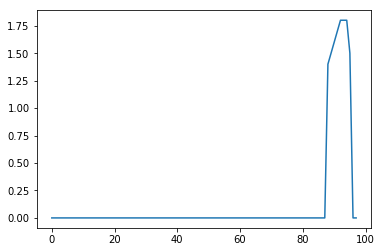

In [47]:
import matplotlib.pyplot as plt
x = np.arange(98)
plt.plot(x,V[0:98])
plt.savefig('./sport_fragment.jpg')
plt.show()

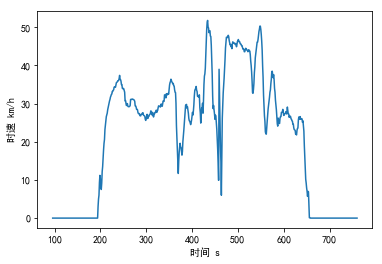

In [51]:
# 上面不理想,绘制第二段
import matplotlib.pyplot as plt
x = np.arange(96,761)
plt.plot(x,V[96:761])
plt.rcParams['font.sans-serif'] = ['simHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.savefig('./sport_fragment2.jpg', dpi=1080)
plt.ylabel(u"时速 km/h")
plt.xlabel(u"时间 s")
plt.show()

In [55]:
len(a_v_list)

3201

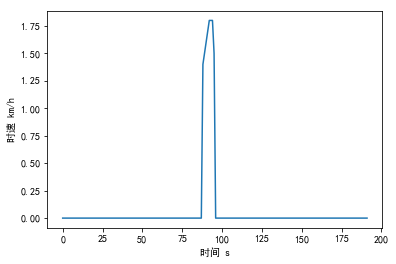

In [73]:
import matplotlib.pyplot as plt
x = np.arange(0,192)
plt.plot(x,V[0:192])
plt.rcParams['font.sans-serif'] = ['simHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel(u"时速 km/h")
plt.xlabel(u"时间 s")
plt.show()

In [54]:
a_v_list = []
a_s_list = []
a_plus_list = []
a_mis_list = []
idling_rate_list = []
a_pos_list = []
a_neg_list = []
v_std_list = []
a_std_list = []

for i in range(len(result_list)-1):
    end_tu = result_list[i+1]
    start_tu = result_list[i]
    
    # 怠速区间[idling_start,idling_end]
    idling_start = start_tu[1]
    idling_end = start_tu[2]
    
    # 运动学片段区间[idling_start,idling_end]
    fragment_start = idling_start
    fragment_end = end_tu[1]
    
    # 全区间时间点长度
    all_length = fragment_end - fragment_start + 1
    
    # 怠速区间时间点个数
    idling_length = idling_end - idling_start + 1
    
    # 平均速度
    a_v = np.mean(V[fragment_start:fragment_end+1])
    a_v_list.append(a_v)
    # 平均行驶速度
    a_s = np.mean(V[idling_end:fragment_end+1])
    a_s_list.append(a_s)
    
    
    # 全区间加速度
    a_list = A[fragment_start:fragment_end+1]
    # 全区间加速度
    a_jia = a_list[a_list>=0]
    # 全区间减速度
    a_jian = a_list[a_list<0]
    
    # 平均加速度
    a_plus = np.sum(a_jia) / all_length
    a_plus_list.append(a_plus)
    
    # 平均减速度
    a_mis = np.sum(a_jian) / all_length
    a_mis_list.append(a_mis)
    
    # 怠速时间比
    idling_rate = idling_length / all_length
    idling_rate_list.append(idling_rate)
    
    # 加速时间比
    a_pos = len(a_jia) / all_length
    a_pos_list.append(a_pos)
    
    # 减速时间比
    a_neg = len(a_jian) / all_length
    a_neg_list.append(a_neg)
    
    # 速度标准差
    v_std = np.std(V[fragment_start:fragment_end+1])
    v_std_list.append(v_std)
    
    # 加速度标准差
    a_std = np.std(a_jia)
    a_std_list.append(a_std)

In [29]:
prepare_pca = pd.DataFrame({
    '平均速度': a_v_list,
    '平均行驶速度': a_s_list,
    '平均加速度': a_plus_list,
    '平均减速度': a_mis_list,
    '怠速时间比': idling_rate_list,
    '加速时间比': a_pos_list,
    '减速时间比': a_neg_list,
    '速度标准差': v_std_list,
    '加速度标准差': a_std_list
})

0.32863510283591413

In [ ]:
prepare_pca.to_csv('prepare_pca.csv', index=0)